# USA Police Shootings Analysis


This analysis aims to explore a dataset sourced from Kaggle.com, focusing on incidents of police shootings in the USA. The dataset encompasses various attributes about individuals involved, such as their name, age, gender, and race. Additionally, it includes details about the shootings, including the date, location, manner of shooting, presence of an attack, possession of weapons, signs of mental illness, recording of the incident via body camera, and whether the suspect attempted to flee. A categorical column denotes the type of weapon utilized by the suspect.

The analysis utilizes tools like Pandas, Numpy, Seaborn, and Matplotlib. It's conducted as part of the assessment for the course "Data Analysis with Python: Zero to Pandas," aiming to glean insights from the dataset and understand patterns or trends within it.

## Downloading the Dataset

The data set used in this analysis was obtained. The data set was then downloaded using Opendatasets - python library.

In [ ]:
project_name = "zerotopandas-course-project-starter" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Data Preparation and Cleaning

The data set is loaded as a data frame using Pandas. The details about the coloumns, rows, ranges, data types are explored here. Unwanted data for the analysis are removed.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data = pd.read_csv('shootings.csv')
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [ ]:
data.shape

(4895, 15)

In [ ]:
data.drop(["name", "id"], axis = 1, inplace = True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [ ]:
data.shape

(4895, 13)

In [ ]:
data.isna().sum()

date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [ ]:
data.dtypes

date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
arms_category                      object
year                                int32
month                               int32
dtype: object

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [ ]:
data.tail()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
4890,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,2020,6
4891,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,2020,6
4892,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,2020,6
4893,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns,2020,6
4894,2020-06-15,shot,gun,31.0,M,White,Lawrence,KS,False,attack,Car,False,Guns,2020,6


In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.



**Exploratory Analysis and Visualization**
---



Since there is only one numarical data - that is Age, and the computation of mean, average, the range are calculated earlier it is not computed under this section. However, Explorartory analysis along with visualisation is carried out to get a better grasp of the data present in the dataset.

Let's begin by importingmatplotlib.pyplot and seaborn.


In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Data on number of deaths disaggrigated by each Races is explored below. The results are presented using a Bar chart.

In [ ]:
shot_by_race = data.race.value_counts()
shot_by_race

race
White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: count, dtype: int64

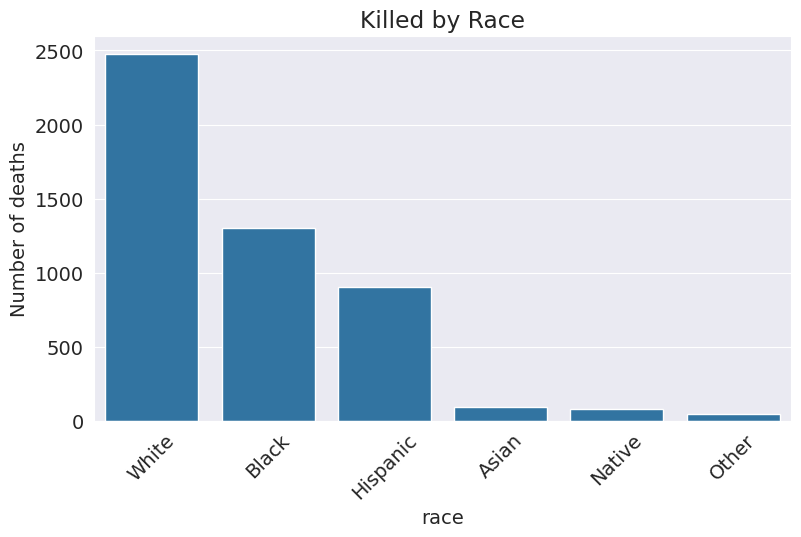

In [ ]:
plt.title("Killed by Race")
sns.barplot(x=shot_by_race.index, y=shot_by_race)
plt.ylabel('Number of deaths')
plt.xticks(rotation=45)
plt.show()

Data on number of deaths disaggrigated by each Gender is explored below. The results are presented using a Pie chart.

In [ ]:
shot_by_gender = data.gender.value_counts()
shot_by_gender

gender
M    4673
F     222
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7d6e819e80a0>,
 [Text(1.0888537659492934, -0.15619691539221137, 'M'),
  Text(-1.0888537659492932, 0.1561969153922125, 'F')],
 [Text(0.5939202359723418, -0.08519831748666074, '95.5%'),
  Text(-0.5939202359723417, 0.08519831748666136, '4.5%')])

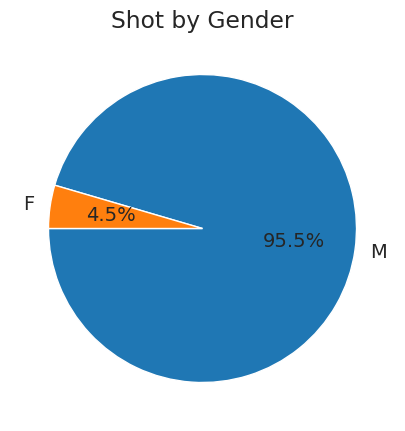

In [ ]:
plt.title("Shot by Gender")
plt.pie(shot_by_gender, labels=shot_by_gender.index, autopct='%1.1f%%', startangle=180)

Data on number of deaths disaggrigated by age group is explored below. The results are presented using a Histogram.

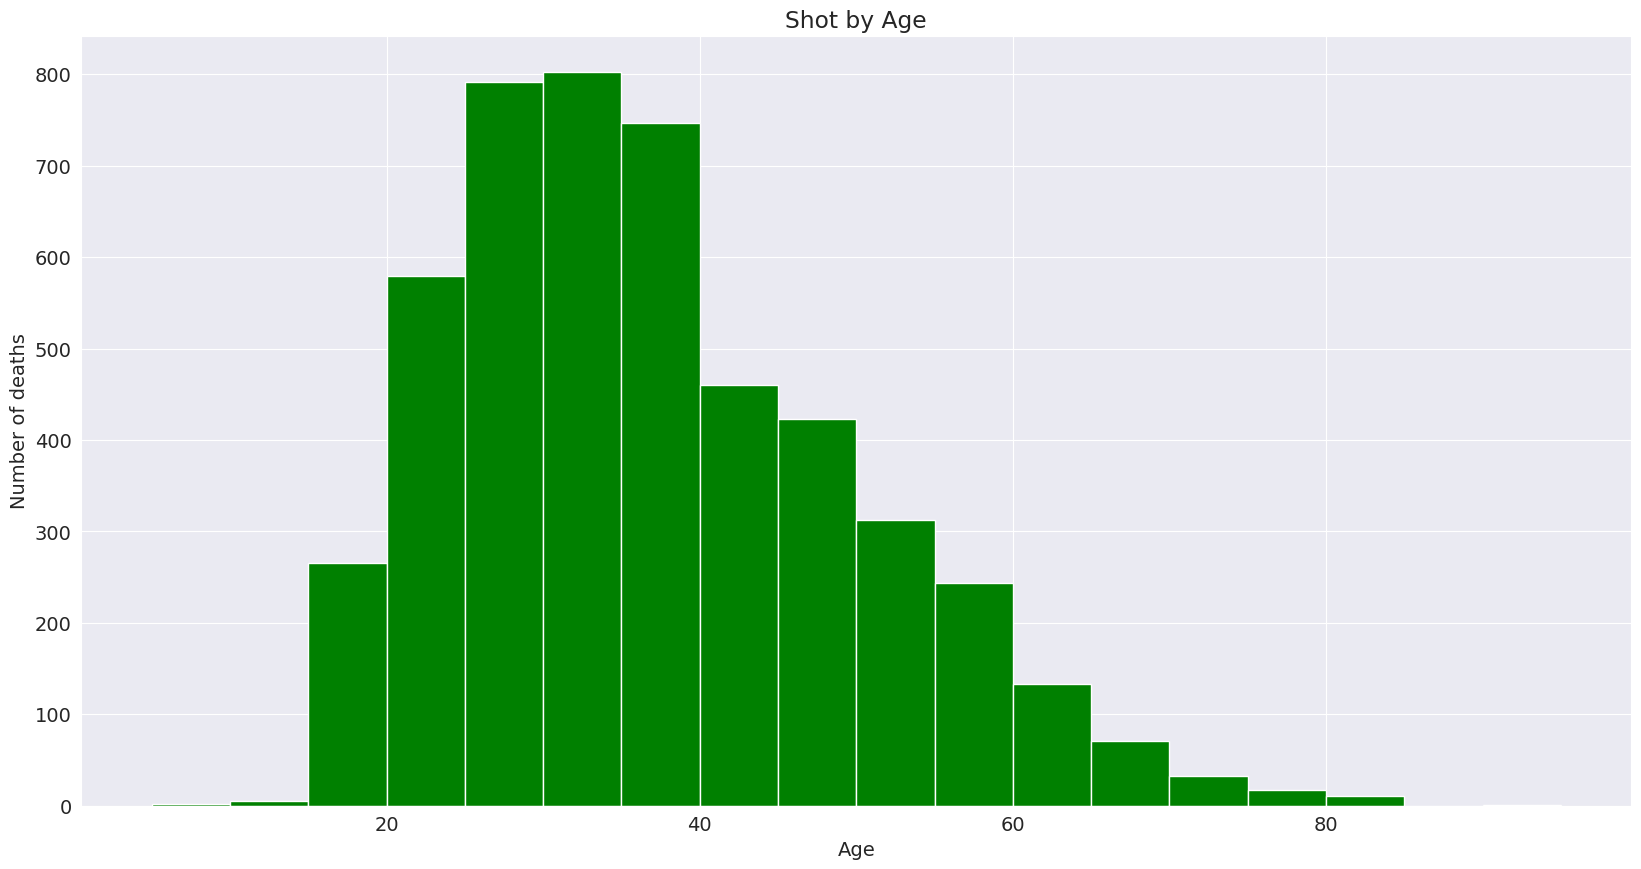

In [ ]:
import numpy as np

plt.figure(figsize=(20, 10))
plt.title("Shot by Age")
plt.xlabel('Age')
plt.ylabel('Number of deaths')
plt.hist(data.age, bins=np.arange(5,100,5), color='green');

Data on number of deaths disaggrigated by each states of the USA is explored below. The results are presented using a Bar plot.

In [ ]:
shot_by_state = data.state.value_counts()
shot_by_state

state
CA    701
TX    426
FL    324
AZ    222
CO    168
GA    161
OK    151
NC    148
OH    146
WA    126
TN    125
MO    124
LA    102
IL     99
PA     95
AL     95
NM     93
VA     92
IN     91
NY     90
WI     88
KY     87
NV     85
SC     80
MD     77
OR     76
AR     73
MI     71
MS     61
NJ     60
MN     60
UT     58
KS     49
WV     46
ID     37
AK     36
MA     33
IA     31
MT     29
HI     29
NE     24
ME     21
CT     20
SD     14
DC     13
WY     13
NH     12
ND     11
DE     10
VT      8
RI      4
Name: count, dtype: int64

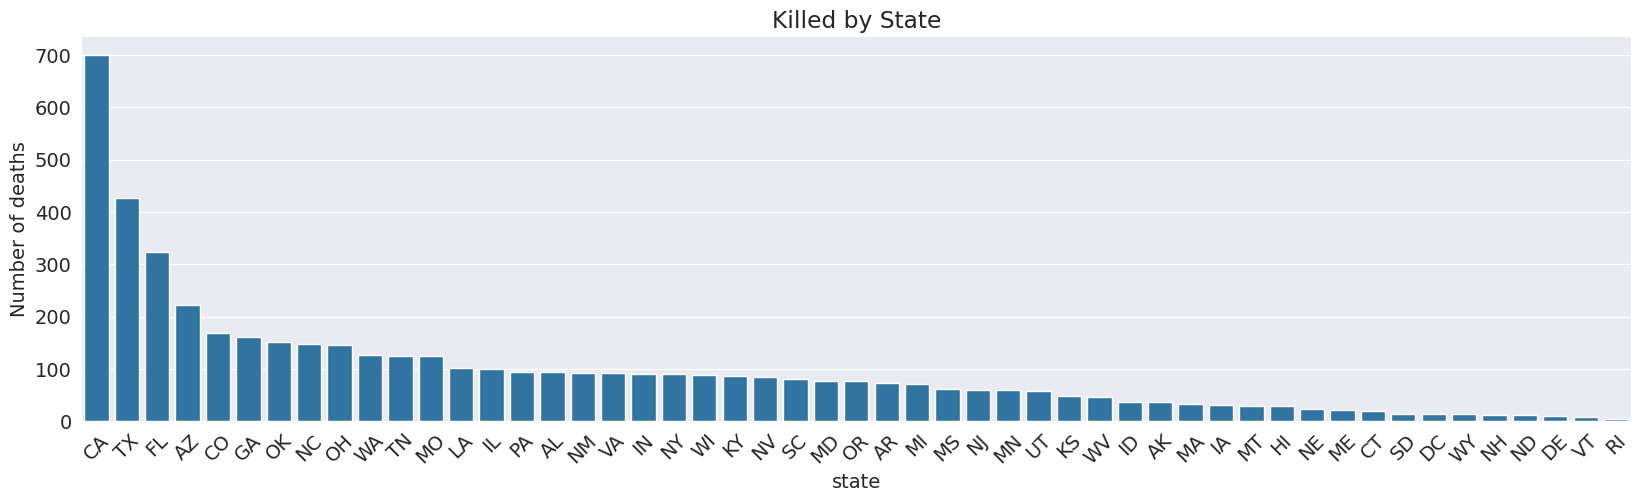

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("Killed by State")
sns.barplot(x=shot_by_state.index, y=shot_by_state)
plt.ylabel('Number of deaths')
plt.xticks(rotation=45)
plt.show()

Data on number of deaths disaggrigated by city is explored below. The results are presented using a Bar chart.

In [ ]:
top20_shot_by_city = data.city.value_counts().head(20)
top20_shot_by_city

city
Los Angeles      78
Phoenix          66
Houston          51
Las Vegas        41
San Antonio      40
Chicago          38
Columbus         36
Albuquerque      32
Jacksonville     31
St. Louis        30
Oklahoma City    30
Kansas City      29
Austin           29
Miami            26
Denver           24
Tucson           23
Louisville       23
Bakersfield      22
New York         21
Atlanta          21
Name: count, dtype: int64

Text(0, 0.5, 'Number of deaths')

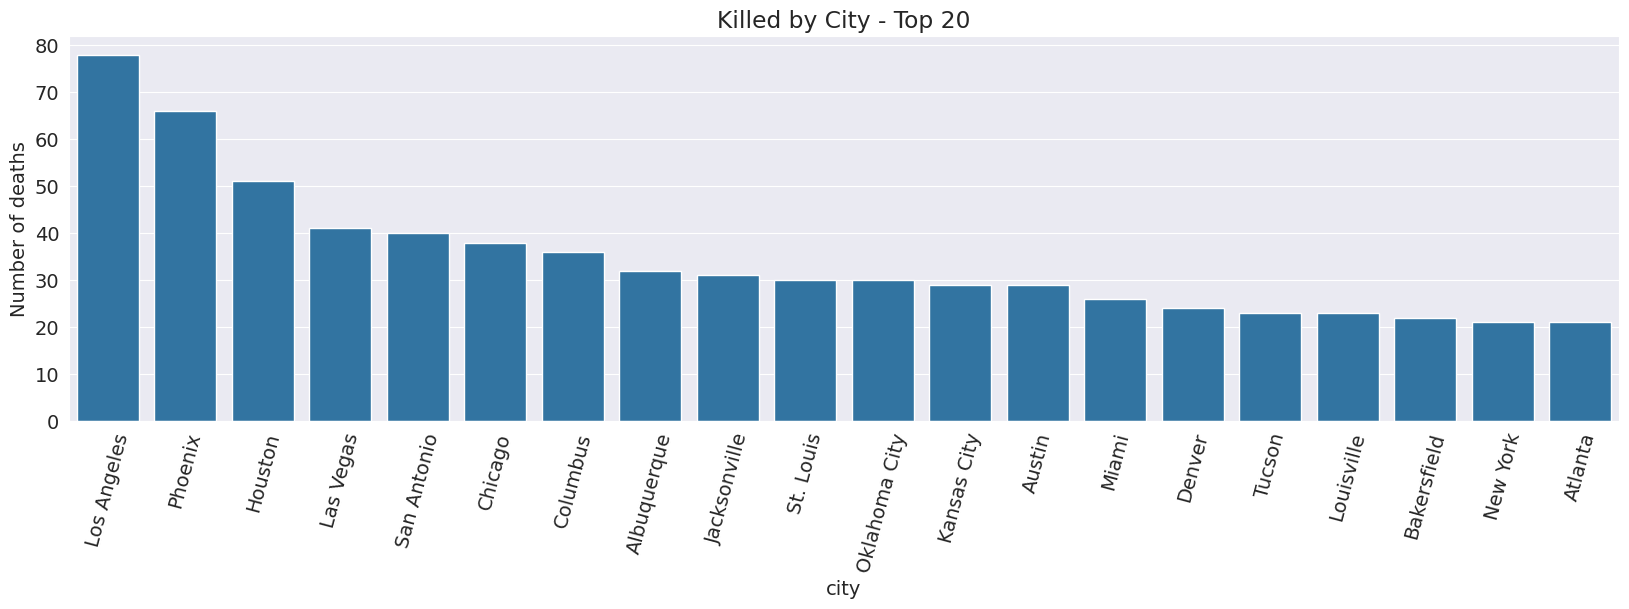

In [ ]:
plt.figure(figsize=(20, 5))
plt.title("Killed by City - Top 20")
plt.xticks(rotation=75)
sns.barplot(x=top20_shot_by_city.index, y=top20_shot_by_city)
plt.ylabel('Number of deaths')

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Asking and Answering Questions





#### Q1: What was the item most of victims were armed with at the time when police shot them?

In [ ]:
shot_by_arms = data.arms_category.value_counts()

In [ ]:
shot_by_arms

arms_category
Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: count, dtype: int64

Text(0, 0.5, 'Number of deaths')

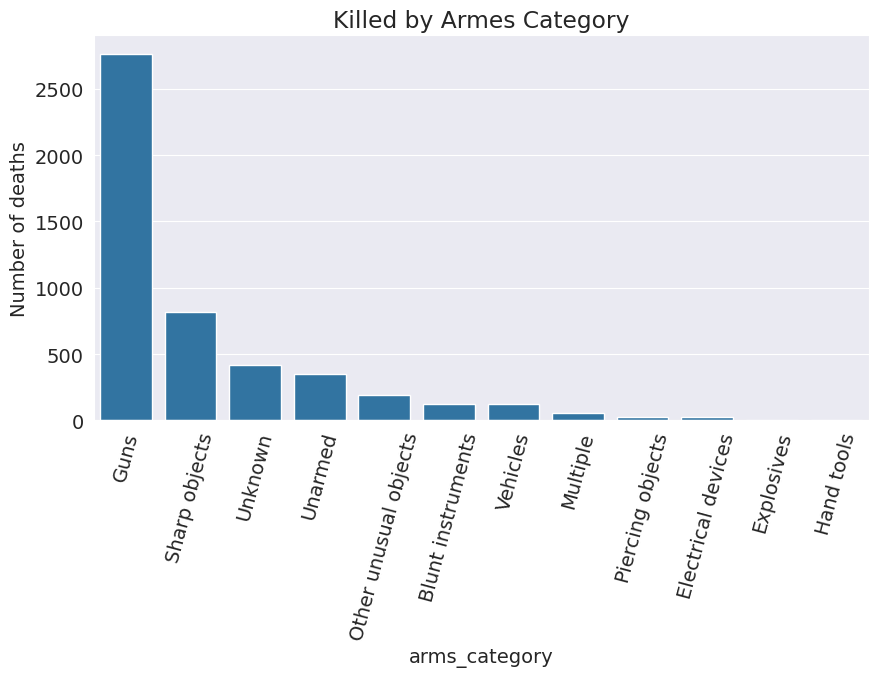

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
plt.title("Killed by Armes Category")
sns.barplot(x = shot_by_arms.index, y = shot_by_arms)
plt.ylabel('Number of deaths')

#### Q2: What was the percentage of vitims showed a sign of mentel illness?

In [ ]:
mental_illness = data.signs_of_mental_illness.value_counts()

In [ ]:
mental_illness

signs_of_mental_illness
False    3792
True     1103
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7d6e7fd84d30>,
 [Text(0.8357010744637424, -0.7152647860339182, 'False'),
  Text(-0.8357011079477028, 0.7152647469119264, 'True')],
 [Text(0.45583694970749583, -0.3901444287457735, '77.5%'),
  Text(-0.4558369679714742, 0.3901444074065053, '22.5%')])

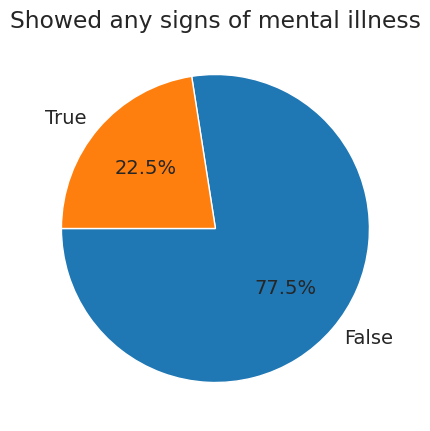

In [ ]:
plt.title("Showed any signs of mental illness")
plt.pie(mental_illness, labels=mental_illness.index, autopct='%1.1f%%', startangle=180)

#### Q3: What was the threat level identifed?

In [ ]:
threat_level_data = data.threat_level.value_counts()

In [ ]:
threat_level_data

threat_level
attack          3160
other           1528
undetermined     207
Name: count, dtype: int64

Text(0, 0.5, 'Number of deaths')

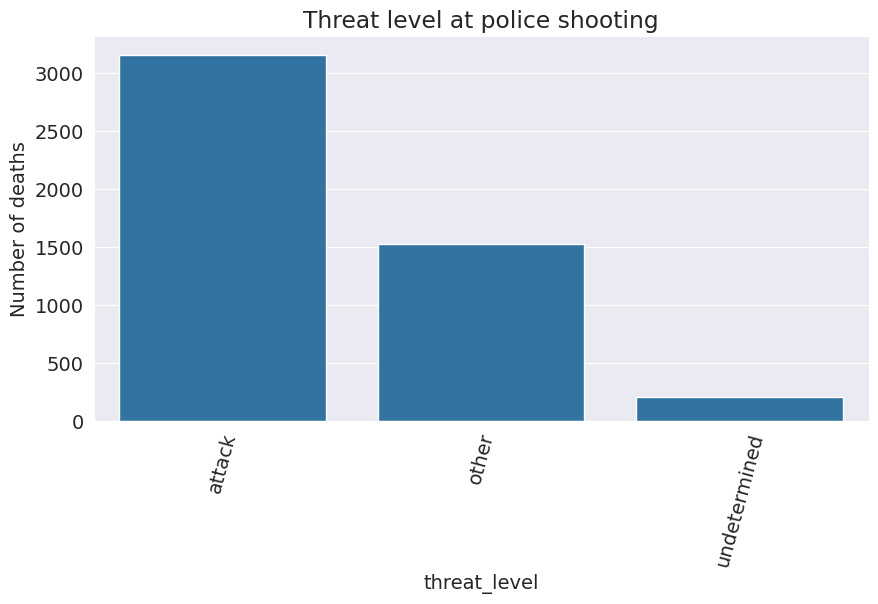

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
plt.title("Threat level at police shooting")
sns.barplot(x = threat_level_data.index, y = threat_level_data)
plt.ylabel('Number of deaths')

#### Q4: Were the victims fleeing, if so how?

In [ ]:
fleeing_victim = data.flee.value_counts()

In [ ]:
fleeing_victim

flee
Not fleeing    3073
Car             820
Foot            642
Other           360
Name: count, dtype: int64

Text(0, 0.5, 'Number of deaths')

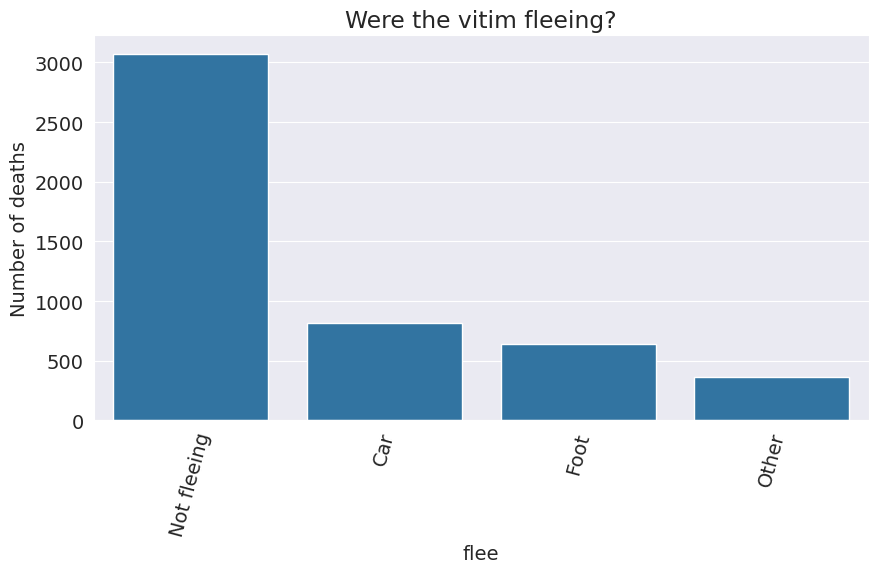

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
plt.title("Were the vitim fleeing?")
sns.barplot(x=fleeing_victim.index, y=fleeing_victim)
plt.ylabel('Number of deaths')

#### Q5: Was there any body cam present?

In [ ]:
body_cam = data.body_camera.value_counts()

In [ ]:
body_cam

body_camera
False    4317
True      578
Name: count, dtype: int64

Text(0, 0.5, 'Number of deaths')

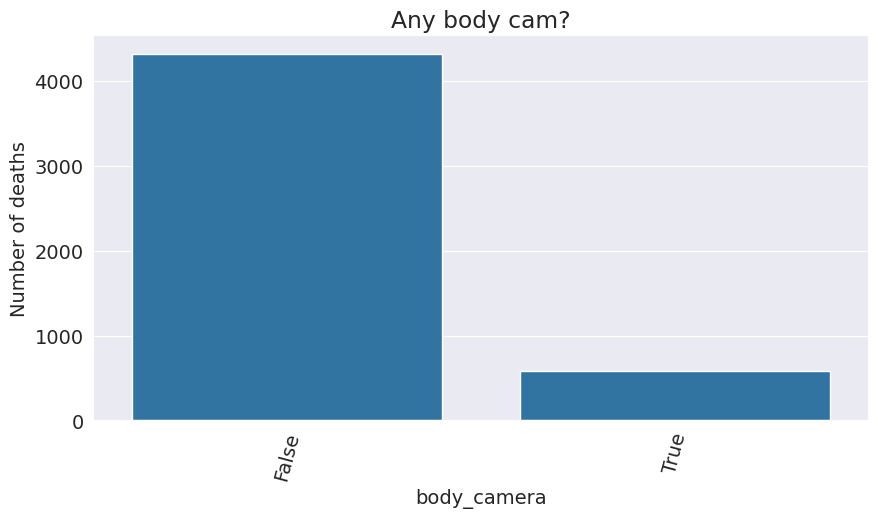

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
plt.title("Any body cam?")
sns.barplot(x=body_cam.index, y=body_cam)
plt.ylabel('Number of deaths')

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Inferences and Conclusion

Most of the time, it was a male who was shot by the police. Further, the rate of white Americans being shot by the police is higher than that of African Americans.

However, more analysis needs to be done to reach a more insightful conclusion in this regard (i.e. the ratio between the total population of each race and the number of people shot)

Almost all the time, when the police officer took the shot, the victim is armed with some sort of weapon. Though a considerable amount of times, the victim is unarmed.

While most of the time, the threat level is identified to be attacking, a considerable amount of the time it was not recognized whether the threat has been attacking or not.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
>
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
>
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml




In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'